In [2]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = False

(15)=
# Chapter 15: RDKit for Cheminformatics <font color = C51E3A> (BETA) </font>

```{warning}
This chapter is still being worked on and proof read for errors. Errors may still exist, and major changes may occur.
```

*Cheminformatics* can be thought of as the intersection of data science, computer science, and chemistry as a means of better understanding and solving chemical problems. This chapter introduces a popular and versatile Python cheminformatics library known as RDKit which is useful for tasks such as:

- Visualizing molecules
- Reading SMILES or InChI representations
- Quantifying structural features in molecules such as number of rings or hydrogen bond donors
- Generating all possible stereoisomers of a molecular structure
- Filtering molecules based on structural features

This is a popular library for those in chemical computing research with examples of its use being relatively easy to find in the chemical literature. As of this writing, RDKit can be installed with either conda or pip (see [section 0.2.1](0.2.1) and link below). If you are using Google Colab, you will need to install RDKit at the top of your notebook (see [section 0.2.2](0.2.2)) as it is not installed by default in Colab.

[Installing RDKit](https://www.rdkit.org/docs/Install.html)

This chapter assumes the following imports from RDKit.

In [3]:
%config InlineBackend.figure_format = 'svg'

In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.Chem.Draw import SimilarityMaps

from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The RDKit package is useful for fundamental tasks in chemical computing such as visualizing molecules, interpreting molecular representations such as SMILES, and quantifying structural features in molecules. RDKit is composed of a number of modules including, but not limited to, the following.

**Table 1** Key Modules and Submodules in the RDKit Library
| Module/Submodule      | Description                |
|:-----------:|:---------------------------|
|`Chem`       |General purpose tools for chemistry ([RDKit website](https://www.rdkit.org/docs/source/rdkit.Chem.html#module-rdkit.Chem) describes it as "A module for molecules and stuff" |
|`Chem.AllChem` | Submodule containing more specialized or less often used features; needs to be imported separatly from `Chem` |
|`Chem.Descriptors` | Submodule for quantifying molecular features | 
|`Chem.Draw` | Submodule for visualizing molecules |
|`ML`         |Machine learning tools      |

The `Chem` and `ML` modules are the major modules in RDKit, but for this chapter, we will only be focusing on the `Chem` module which has already been imported above.

(15.1)=
## 15.1 Loading Molecular Representations into RDKit

```{index} SMILES
```
```{index} InChI
```

There are many ways to depict molecular structures on paper such as Lewis structures, line-angle structural formulas, and condensed notation. When representing molecules for a computer, machine-readable methods such as Simplified Molecular-Input Line-Entry System (SMILES), the International Chemical Identifier (InChI), or mol files are preferred. For example, the SMILES and InChI representations for benzene are listed below.

    SMILES: c1ccccc1

    InChI: 1S/C6H6/c1-2-4-6-5-3-1/h1-6H

These are not the most human-readable formats, but computer software such as RDKit is quite good at dealing with them. We will not get into the structure and rules for interpreting these representations here because it is not really neccesary; reading and writing them is RDKit's job. You can obtain these representations of a molecular structure from a variety of sources such as generating them from chemical drawing software (e.g., ChemDraw or ChemDoodle), searching [NIST Chemical Webbook](https://webbook.nist.gov/chemistry/) or [NIH PubChem](https://pubchem.ncbi.nlm.nih.gov/), and many other sources. In this chapter, we will mainly focus on SMILES representations, but working with the InChI and MOL file formats is analogous and may be used from time-to-time herein.

The functions below can read and write molecular structures from a variety of formats including SMILES, InChI, and MOL files. When reading these molecular structures, a Molecule object (RDKit-specific class of object) is generated. 

**Table 2** Functions for Loading Molecular Structures
| Function      | Description                |
|:-------------:|---------------------------|
|`Chem.MolFromSmiles()`   | Loads molecules from SMILES representation |
|`Chem.MolToSmiles()` | Generates SMILES representation of a Molecule object |
|`Chem.inchi.MolFromInchi()` | Loads molecules from InChI representation |
|`Chem.inchi.MolToInchi()` | Generates InChI representation from a Molecule object |
|`MolFromMolFile()` | Loads a MOL file |

As an example, we will load the structure of aspirin (acetylsalicylic acid) using the `Chem.MolFromSmiles()` function from the `Chem` module.

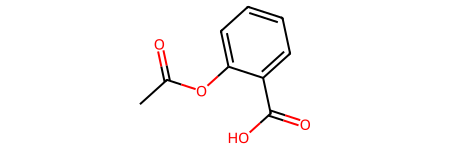

In [5]:
aspirin = Chem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
aspirin

If we check the object type, we find that it is a Molecule (`rdchem.Mol`) RDKit object.

In [6]:
type(aspirin)

rdkit.Chem.rdchem.Mol

RDKit can generate other molecular representations such as InChI from the Molecule object as demonstrated below.

In [7]:
Chem.inchi.MolToInchi(aspirin)

'InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)'

(15.2)=
## 15.2 Visualizing Chemical Structures

In the above examples, RDKit provided an image of the molecule simply by Jupyter running the Molecule object. By default, this generates a rather small and low resolution image. To generate a sharper image, like above, running the following code at the top of a notebook changes the settings to produce SVG (Scalable Vector Graphic) images which are a vector graphic format.

~~~python
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
~~~

(15.2.1)=
### 15.2.1 Single Chemical Structures

However, simply running the Molecule object does not provide easy control over the image. In this section, we will generate images that can be saved along with visualizing grids of molecules and other visual representations.

To view the molecule, we can use the `Chem.Draw.MolToImage(Mol)` function which takes one required positional arguments of the Molecule object (`Mol`). Optional keyword arguments can be used to set other parameters such as the image size (`size=`) in pixels.

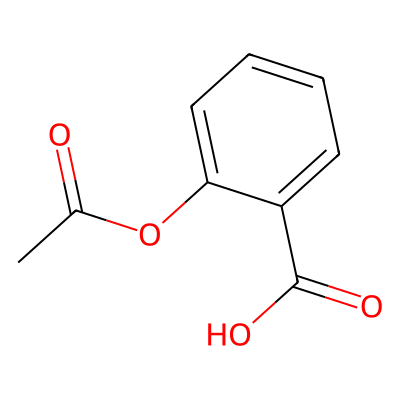

In [8]:
Chem.Draw.MolToImage(aspirin, size=(400,400))

If we want to save the image to a file, this is accomplished using the `Chem.Draw.MolToFile()` function which requires two pieces of information - the Molecule object and the name of the new file as a string.

~~~python
Chem.Draw.MolToFile(mol_object, 'file_name.png', size=(width, height), imageType='png')
~~~

Other optional parameters include the `size=` which is a tuple that takes the width and height, respectively, in pixels, and the `imageType=` accepts a string to designate the file format ('png' or 'svg').

````{margin}
```{note}
The PNG file formate is a great general-purpose raster file format. Unless you know you need a different file format, this is often a good choice. The SVG file format is a vector format which makes it easily editable in software applications such as [Inkscape](https://inkscape.org/).
```
````

````{margin}
```{note} 
It is important that the extension (e.g., ".png") matches the `imageType=` argument or else your computer may have difficulties opening the file.
```
````

In [9]:
Chem.Draw.MolToFile(aspirin, 'aspirin.svg',
                    size=(500,500),
                    imageType='svg')

Molecules can also be displayed in plots created by matplotlib. Below is an example of the *trans*-cinnamic acid structure being displayed on top of the IR spectrum of the compound.

In [10]:
cinn_acid = Chem.MolFromSmiles('O=C(O)\C=C\c1ccccc1')
image = Chem.Draw.MolToImage(cinn_acid)

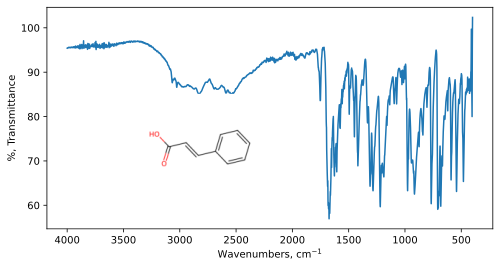

In [11]:
IR = np.genfromtxt('data/cinnamic_acid.CSV', delimiter=',')

plt.figure(figsize=(8,4))
plt.plot(IR[:-1,0], IR[:-1,1])
plt.gca().invert_xaxis()
plt.xlabel('Wavenumbers, cm$^{-1}$')
plt.ylabel('%, Transmittance')

ax = plt.axes([0.15, 0.2, 0.48, 0.38], frameon=False)
ax.axis('off')
ax.imshow(image)

(15.2.2)=
### 15.2.2 Grids of Chemical Structures

Whenever we are dealing with collections of molecules, it may be helpful to generate an image that includes multiple molecular structures known as a grid. As an example, we will load the SMILES strings of the twenty common amino acids from a text file using pandas and then load the Molecule objects for each structure into a single list called `AminoAcids`.

In [12]:
df = pd.read_csv('data/amino_acid_SMILES.txt', skiprows=2)
df

,name,SMILES
0,alanine,C[C@@H](C(=O)[O-])[NH3+]
1,arginine,[NH3+][C@@H](CCCNC(=[NH2+])N)C(=O)[O-]
2,asparagine,O=C(N)C[C@H]([NH3+])C(=O)[O-]
3,aspartate,C([C@@H](C(=O)[O-])[NH3+])C(=O)[O-]
4,cysteine,C([C@@H](C(=O)[O-])[NH3+])S
5,glutamine,[NH3+][C@@H](CCC(=O)N)C([O-])=O
6,glutamate,C(CC(=O)[O-])[C@@H](C(=O)[O-])[NH3+]
7,glycine,C(C(=O)[O-])[NH3+]
8,histidine,O=C([C@H](CC1=CNC=N1)[NH3+])[O-]
9,isoleucine,CC[C@H](C)[C@@H](C(=O)[O-])[NH3+]


In [13]:
AminoAcids = [Chem.MolFromSmiles(SMILES) for SMILES in df['SMILES']]
AminoAcids

To generate the grid, we will use the `MolsToGridImage()` function from the `Chem.Draw` submodule. This function requires one positional argument of an array-like object (e.g., list, tuple, ndarray, etc.) containing the Molecule objects. Other optional keyword arguments include the number of molecules per row (`molsPerRow=`), the pixel dimensions of each molecule (`subImgSize=`), labels below each molecule (`legends=`), and the ability to make images SVG format (`usesSVG=`). The image dimensions only matter if using a raster image format and requires a tuple with the width and height in that order. The `legends=` argument requires an array-like object with the labels in the same order as the object containing the Molecule objects.

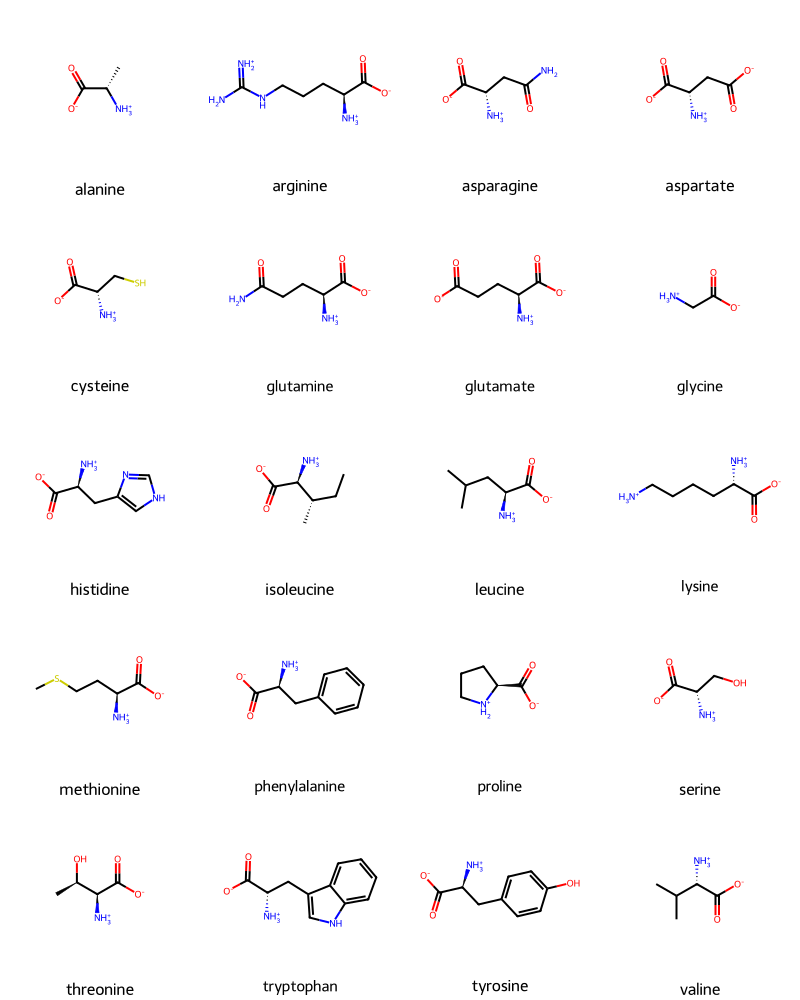

In [14]:
Chem.Draw.MolsToGridImage(AminoAcids, 
                          molsPerRow=4,
                          subImgSize=(200,200),
                          legends=list(df['name']),
                          useSVG=True)    

````{margin}
```{note}
If you're wondering what's up with the `AllChem` submodule, it stores lesser used features separately from the more mainstay features. By storing these features separately, it speeds up importing the main features. However, the extra cost in time is not substatial, and this submodule contains some cool features such as [generating all possible stereoisomers](15.3.2) and [filtering molecules based on structural features](15.5).
```
````

(15.3)=
## 15.3 Stereochemistry

```{index} stereochemistry
```
```{index} isomers
```

RDKit can assign the stereochemistry of molecules, including chiral centers (*R* vs. *S*) and alkenes (*E* vs. *Z*), to determine the number of isomers possible, and even generate all possible isomers. Whether or not any stereochemistry is designated in the SMILES representation or Molecule object is an important detail in carrying out the above tasks. Even though a molecule may contain a chiral center or an alkene, the stereochemistry around that feature may be ambiguous. 

The SMILES representation shows stereochemistry around a tetrahedral carbon with either **@** or **@@** and around an alkene with **\\** and **/** symbols. If the SMILES representation does not include these symbols, the stereochemistry is not indicated.

**Table 3** SMILES Stereochemical Designations
| Designation | Alkene |  Chiral sp$^3$ Atom |
|:---:|--------------|----------------|
|No isomer designation | C(=CC)C | CCC(C)O |
|First isomer |C/C=C\C | CC\[C@H](C)O |
|Second isomer| C/C=C/C |CC\[C@@H](C)O |

(15.3.1)=
### 15.3.1 Assigning Stereochemistry

The first task is to assign the absolute stereochemistry of a molecule. As an example, below we have a single isomer of pent-3-en-2-ol which has a single chiral center and an alkene that could potentially be either *E* or *Z*. Let's have RDKit tell us the absolute configuration (i.e., *R* or *S*) of the tetrahedral chiral center and if the alkene is *E* or *Z*. First, we will load the SMILES representation of this compound, `O[C@@H](C)/C=C/C`, which contains both **@** and **/** symbols, so we know the stereochemistry is assigned in this representation. When we visualize it below, we can see a wedge for the methyl on the chiral center instead of a regular line, for example.

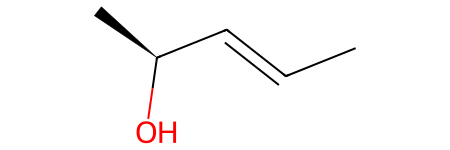

In [15]:
pentenol = Chem.MolFromSmiles('O[C@@H](C)/C=C/C')
pentenol

To obtain the absolute configuration (i.e.,R or S), we can use the `Chem.FindMolChiralCenters()` function which returns the absolute configuration and an index indication which atom has that configuration.

In [16]:
Chem.FindMolChiralCenters(pentenol)

[(1, 'S')]

Our pent-3-en-2-ol isomer above has an *S* stereocenter. Being that pent-3-en-2-ol has only one stereocenter, it is not difficult to determine which atom has the stereochemistry, but if there are multiple chiral centers, it can get confusing. To see the atom indices and stereochemistry labels on the molecule, this can be turned on (or off using `False`) by the following code.

````{margin}
```{warning}
The index values are assigned by RDKit and are **not** the same thing as the numbers from systematic nomenclature.
```
````

In [17]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = True

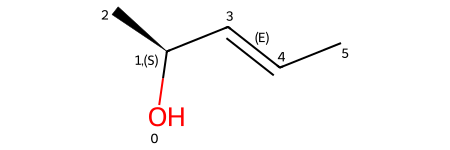

In [18]:
pentenol

To obtain the stereochemistry of double bonds, we can iteration through the bonds and obtain the stereochemistry using the `GetStereo()` bond method as shown below. There are three possible outputs list below.

````{margin}
```{note}
For more information on bond methods, see [section 15.6](15.6).
```
````
**Table 4** Bond Stereochemical Designations in RDKit
| Ouput | Description |
|:------:|   ------------|
|STEREONONE | No stereochemistry (often not a double bond) |
|STEREOE | *E* stereochemistry |
|STEREOZ | *Z* stereochemistry |

````{margin}
```{note}
`STEREONONE` indicates there is no bond stereochemistry which could be the result of a singel or triple bond or it could be the result of the alkene bond has multiple equivalent substituents on the same carbon (e.g., 2-methylpent-2-ene).
```
````

In [19]:
for bond in pentenol.GetBonds():
    print(bond.GetStereo())

STEREONONE
STEREONONE
STEREONONE
STEREOE
STEREONONE


In the above example, there are four bonds with no stereochemistry due to being single bonds, and there is one *E* bond corresponding to the alkene. If there are multiple double bonds, it can be difficult to determine which bond has which stereochemistry. In this case, either use the image like shown above or use additional
bond methods (see [section 15.6](15.6)) to obtain more information about the bonds.

As another example, below we will look at the bonds in 9-*cis*-retinoic acid where we can see examples of all three possible bond stereochemical assignments.

In [20]:
retinoic = Chem.MolFromSmiles('O=C(O)\C=C(\C=C\C=C(/C=C/C1=C(/CCCC1(C)C)C)C)C')

for bond in retinoic.GetBonds():
    print(bond.GetStereo())

STEREONONE
STEREONONE
STEREONONE
STEREOE
STEREONONE
STEREOE
STEREONONE
STEREOZ
STEREONONE
STEREOE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE


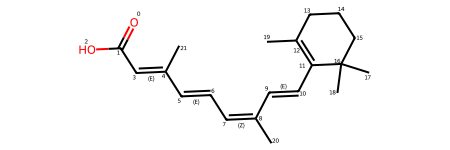

In [21]:
retinoic

(15.3.2)=
### 15.3.2 Counting and Generating Isomers

Another interesting feature of RDKit is the ability to determine the number of stereoisomers possible for a given structure and to generate the different isomers. In both these applications, RDKit treats any explicitly assigned stereocenter as fixed and will not allow it to be changed. For example, below we will again look at (2*S*, 3*E*)-pent-3-en-2-ol. Because the structure already designates this an (2*S*, 3*E*) isomer, the stereochemistry of the chiral center and alkene cannot be changed. As a result, when using the `GetStereoisomerCount()` method from the `EnumerateStereoisomers` module, it returns a `1` indicating that there is only one stereoisomer possible with these constraints.

In [22]:
Chem.EnumerateStereoisomers.GetStereoisomerCount(pentenol)

1

In contrast, if we provide the `GetStereoisomerCount()` function hexan-2-ol without any stereochemistry designated (see [above](15.3)), it returns 2 as the number of stereoisomers. This is because (*S*)-hexan-2-ol and (*R*)-hexan-2-ol are both possible isomers.

In [23]:
hexanol = Chem.MolFromSmiles('OC(C)CCCC')
Chem.EnumerateStereoisomers.GetStereoisomerCount(hexanol)

2

The `EnumerateStereoisomers` module can also generate the different possible isomers, and again, it will only generate isomers by changing stereochemical features that do not already have assigned configurations. If we again look at hexan-2-ol, it generates two Molecule objects which are the two isomers.

In [24]:
isomers = list(Chem.EnumerateStereoisomers.EnumerateStereoisomers(hexanol))
isomers

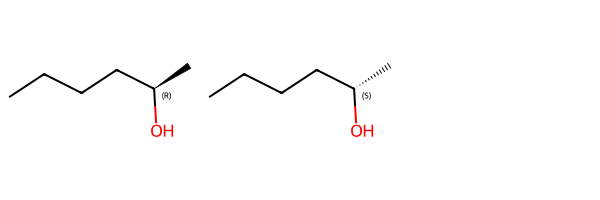

In [25]:
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True

Chem.Draw.MolsToGridImage(isomers)

As a more challenging example, arabinos has three chiral centers allowing for up to eight possible stereoisomers. Because there is a lack of symmetry between the top and bottom (i.e., -CHO and -CH$_2$OH are different), no meso compound can exist, so it will have the full eight stereoisomers. The real challenge lies in drawing out all eight... unless we make RDKit do the work for us like below.

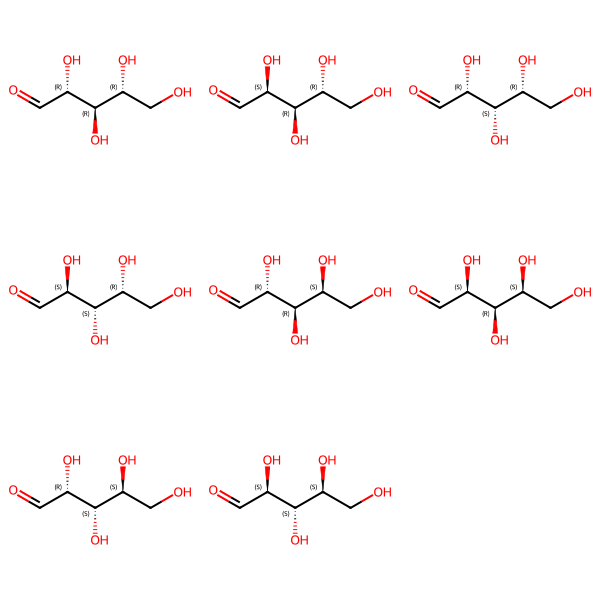

In [26]:
arabinos = Chem.MolFromSmiles('O=CC(O)C(O)C(O)CO')
isomers = list(Chem.EnumerateStereoisomers.EnumerateStereoisomers(arabinos))
Chem.Draw.MolsToGridImage(isomers, useSVG=True)

While the examples above mainly focus on stereoisomers from tetrahedral chiral centers, this also works with *E/Z* stereoisomers. One limitation with RDKit is that it currently struggles to recognize non-alkene *cis/trans* stereoisomers when there are stereocenters that are not chiral centers involved such as rings (see [GitHub issue 5597](https://github.com/rdkit/rdkit/issues/5597)). For example, with 1,2,3-trimethylcyclopropane, it only believes there is one stereoisomer when in fact there are two.

````{margin}
```{note}
A chiral center is a specific example of stereogenic center that is an sp$^3$ atom with four different substituents whereas a stereogenic center is any atom where exchanging any two substituents/ligands produces a different stereoisomer. For example, 1,4-dimethylcyclohexane has two stereogenic centers but no chiral centers.
```
````

In [27]:
TriCProp = Chem.MolFromSmiles('CC1C(C1C)C ')
Chem.EnumerateStereoisomers.GetStereoisomerCount(TriCProp)

1

In contrast, it has no difficulty identifying the three isomers for 1,2-dimethylcyclopropane because both methylated carbons are chiral centers.

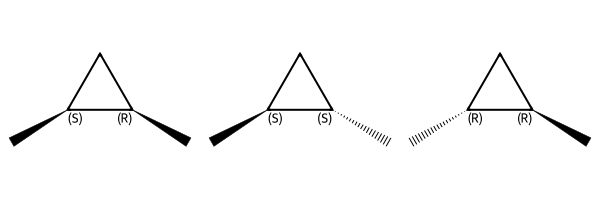

In [28]:
DiCProp = Chem.MolFromSmiles('CC1CC1C')
CPropisomers = list(Chem.EnumerateStereoisomers.EnumerateStereoisomers(DiCProp))
Chem.Draw.MolsToGridImage(CPropisomers)

(15.4)=
## 15.4 `Chem.Descriptor` Module 

```{index} descriptors
```
```{index} features
```

RDKit can be use to determine a number of key physical properties of molecules known as *descriptors* using the `Chem.Descriptor` module. These can be useful for generating features for a large number of molecules for machine learning or understanding structural trends in a body of chemical compounds.

(15.4,1)=
### 15.4.1 Molecular Features

There are numerous descriptor functions available which are callable using `Chem.Descriptors.method()` where `method()` is the name of a descriptor function that accepts an RDKit Molecule object and returns a numerical value. Below are a few examples of descriptor functions, and a more complete list is available on the [RDKit website](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors).

**Table 5** Examples of Molecular Descriptors
| Function    |  Description |
|:-------------:|---------------------------|
|`MolWt` | Molecular weight, assumes natural isotopic distribution  |
|`HeavyAtomCount()` | Number of non-hydrogen atoms |
|`NOCount()` | Number of N and O atoms |
|`NumAliphaticRings()` | Number of aliphatic rings
|`NumAromaticRings()` | Number of aromatic rings |
|`NumSaturatedRings()` | Number of saturated rings |
|`NumHAcceptors()`   | Number of hydrogen bond acceptors   |
|`NumHDonors()` | Number of hydrogen bond donors |
|`NumRadicalElectrons()`   |Number of radical electrons |
|`NumValenceElectrons()` | Number of valence electrons |
|`NumRotatableBonds()` | Number of rotatable bonds |
|`RingCount()` | Number of rings |

Below we will look at a few of these descriptor functions demonstrated on the compound paclitaxel. Specifically, we will generate the molecular weight, number of rings, number of aromatic rings, number of valence electrons, and number of rotatable bonds.

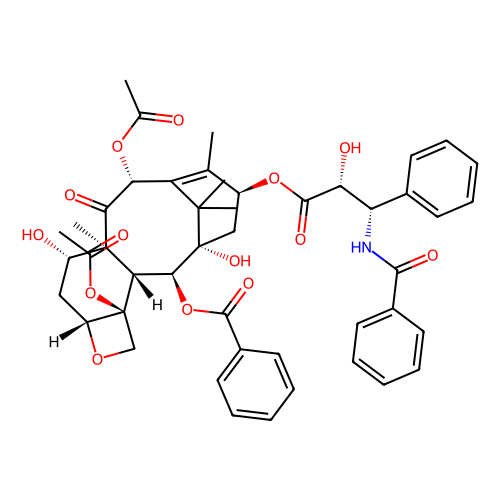

In [29]:
ptx = Chem.MolFromSmiles('CC1=C2[C@@]([C@]([C@H]([C@@H]3[C@]4([C@H](OC4)C[C@@H]'\
                         '([C@]3(C(=O)[C@@H]2OC(=O)C)C)O)OC(=O)C)OC(=O)c5ccccc5)'\
                         '(C[C@@H]1OC(=O)[C@H](O)[C@@H](NC(=O)c6ccccc6)c7ccccc7)O)(C)C')
Chem.Draw.MolToImage(ptx, size=(500,500))

In [30]:
# molecular weight
Chem.Descriptors.MolWt(ptx)

853.9180000000003

In [31]:
# number of rings
Chem.Descriptors.RingCount(ptx)

7

In [32]:
# number of aromatic rings
Chem.Descriptors.NumAromaticRings(ptx)

3

In [33]:
# number of valence electrons
Chem.Descriptors.NumValenceElectrons(ptx)

328

In [34]:
# number of rotable bonds
Chem.Descriptors.NumRotatableBonds(ptx)

10

(15.4.2)=
### 15.4.2 Quantifying Functional Groups

Among the descriptor methods is a long list of functions that look like `fr_group()` where `group` is the name or abbreviation of a chemical functional group. These functions return an integer quantification of that functional group present in the molecule. A table with a few examples is provided below, but there are over 80 of these functions available in RDKit.

**Table 6** Examples of Methods to Quantify Functional Groups
| Function    |  Functional Group |
|:-----------:|---------------------------|
|`fr_Al_OH()` | Aliphatic alcohols  |
|`fr_aldehyde()` | Aldehydes |
|`fr_amide()` | Amide |
|`fr_C_C()`   | Carbonyl oxygens   |
|`fr_guanido()` | Guanidine |
|`fr_NH0()`   | Amines with 0 H's (i.e., tertiary) |
|`fr_phenol()` | Phenol |
|`fr_phos_ester()` | Phosphoric ester |
|`fr_SH()` | Thiol |

```{tip}
To see a complete list of functional groups, type `Chem.Descriptors.fr_` into a code cell, press **Tab** for autocomplete, and see the long list of options. If the functional group is not obvious from the name, place the computer cursor inside the function's parentheses and press **Shift + Tab** to see the Docstring description of what functional group it quantifies. 
```

We will again look at paclitaxel to see how many benzene rings, aliphatic alcohols, aromatic carboxyls, and esters are present in the structure.

In [35]:
# number of benzene rings
Chem.Descriptors.fr_benzene(ptx) 

3

In [36]:
# number of alphatic alcohols
Chem.Descriptors.fr_Al_OH(ptx)

3

In [37]:
# number of aromatic carboxyls
Chem.Descriptors.fr_Ar_COO(ptx)

0

In [38]:
# number of esters
Chem.Descriptors.fr_ester(ptx)

4

(15.5)=
## 15.5 Searching Molecules for Structural Patterns

Molecules can be searched for key structural features using the `HasSubstructMatch()` method which returns `True` or `False` depending if a structural pattern exists in a molecule or not. This function requires two RDKit Molecule objects - one Molecule object (`molecule`) is checked for the presence of the other molecule object structure (`substructure`) as shown below. There are optional keyword parameters such as `useChirality=` which allows for chirality to be factored into whether there is a match or not. The default setting for `useChirality` is `False`.

~~~python
molecule.HasSubstructMatch(substructure, useChirality=False)
~~~

As an example, we will look for the presence of a carbonyl (i.e., C=O bond) in acetone and pent-3-en-2-ol below, so the substructure that we will search for is a `C=O`.

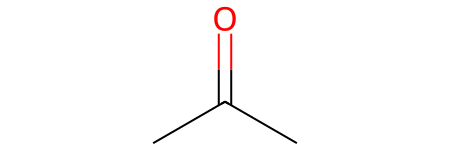

In [39]:
acetone = Chem.MolFromSmiles('CC(=O)C')
acetone

In [40]:
substructure = Chem.MolFromSmiles('C=O')
acetone.HasSubstructMatch(substructure)

True

In [41]:
pentenol.HasSubstructMatch(substructure)

False

Not very surprisingly, the `HasSubstructMatch()` function returns `True` for acetone and `False` for the alcohol because the latter has a single CO bond, not a double. If we change our substructure to `CO`, we are now searching for a carbon-oxygen single bond (see Table 7), so acetone returns `False` while pent-3-en-2-ol returns `True`.

**Table 7** SMILES Bond Order Notation
| SMILES Bond | Bond Type |
|:----------:|------------|
| - (or nothing) | Single |
| = | Double |
| # | Triple |
|: | Aromatic |

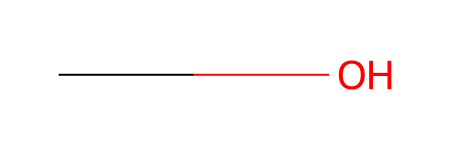

In [42]:
substructure = Chem.MolFromSmiles('CO')
substructure

In [43]:
acetone.HasSubstructMatch(substructure)

False

In [44]:
pentenol.HasSubstructMatch(substructure)

True

For a more interesting set of examples, we can search our collection of 20 common amino acids (see [section 15.2.2](15.2.2)) for key substructures. We will start by using glycine, the simplest of the common amino acids, as the substructure which should return all 20 amino acids. As an extra step below, we will also orient all the amino acids in the same way with respect to the substructure. That is, the substructural element that we are searching for in each amino acid will be oriented the same way for all 20 amino acids.

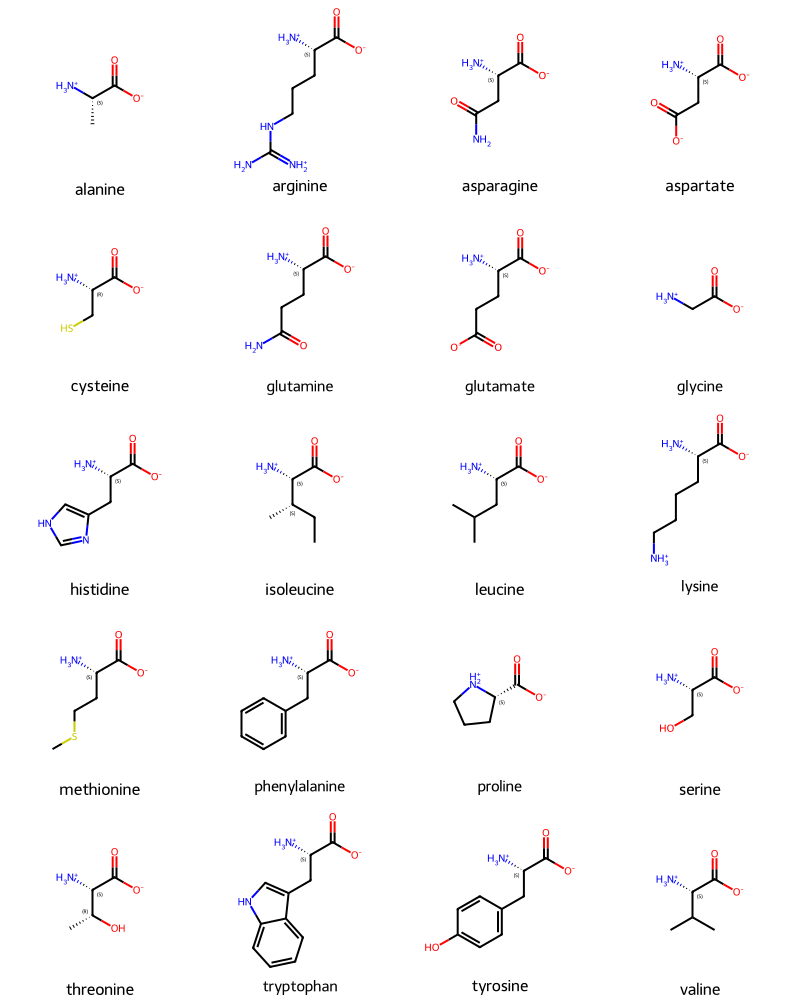

In [45]:
# seraches for substruture
substructure= Chem.MolFromSmiles('C(C(=O)[O-])[NH3+]')
matching_amino_acids = [AA for AA in AminoAcids if AA.HasSubstructMatch(substructure)]

# orients common substructures the same way
AllChem.Compute2DCoords(substructure)
for amino_acid in matching_amino_acids:
    _ = AllChem.GenerateDepictionMatching2DStructure(amino_acid, substructure)

# generates grid of matching molecules
Chem.Draw.MolsToGridImage(matching_amino_acids, 
                          molsPerRow=4,
                          subImgSize=(200,200),
                          legends=list(df['name'])) 

Indeed, it did return all 20 amino acids, and notice how the core structure of all amino acids are oriented the same direction. Now let us try something a little more interesting by search for all amino acids with a benzene ring in them. The substructural bonding pattern in this case is benzene itself, and the three aromatic amino acids are returned.

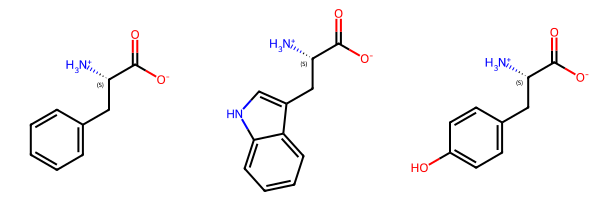

In [46]:
substructure = Chem.MolFromSmiles('c1ccccc1')
AA_with_pattern = [AA for AA in AminoAcids if AA.HasSubstructMatch(substructure)]

Chem.Draw.MolsToGridImage(AA_with_pattern)

It might be nice to still have the name labels for our three matches, so the above search is repeated but instead on a zip object comprised of the names of the amino acids and the Molecule objects. 

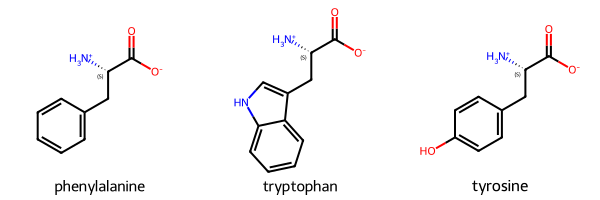

In [47]:
AA_zipped = list(zip(df['name'], AminoAcids))

substructure = Chem.MolFromSmiles('c1ccccc1')
with_pattern = [AA for AA in AA_zipped if AA[1].HasSubstructMatch(substructure)]

name = [AA[0] for AA in with_pattern]
mol_obj =  [AA[1] for AA in with_pattern]

Chem.Draw.MolsToGridImage(mol_obj, legends=name)

Finally, we can also compare two chemical structures, the probe molecule and the reference molecule, using a similarity map function `SimilarityMaps()`. This generates an image of the probe molecule's structure with highlighting showing where the two structures are similar (green with solid outline) and dissimilar (red with dotted outline). The similarity map function requires three arguments - the reference molecule (`ref_mol`), the probe molecule (`probe_mol`), and a fingerprint function (`fp_func`).

~~~python
SimilarityMaps(refMol, probeMol, fp_func)
~~~

The latter option can be any of the following three functions which also accept other optional parameters of their own that can affect the outcome.

**Table 8** Fingerprint Functions from the `SimilarityMaps` Submodule
| Function | Description |
|:--------:|-------------|
|`GetMorganFingerprint` | Morgan fingerprint |
|`GetAPFingerprint` | Atom pairs fingerprint |
|`GetTTFingerprint()` | Topological torsions fingerprint |

In the example below, we compare tryptophan and histidine with tryptophan as the probe molecule (`probe_mol`) and histidine as the reference molecule (`ref_mol`). Because tryptophan is the probe molecule, it is displayed below the code with highlighting showing how it is similar or different from histidine. The backbond of the tryptophan is in green with solid outlines because it is the common feature between the two amino acids while the side chain is mostly red with dotted outlines because the two amino acids differ in this regard.

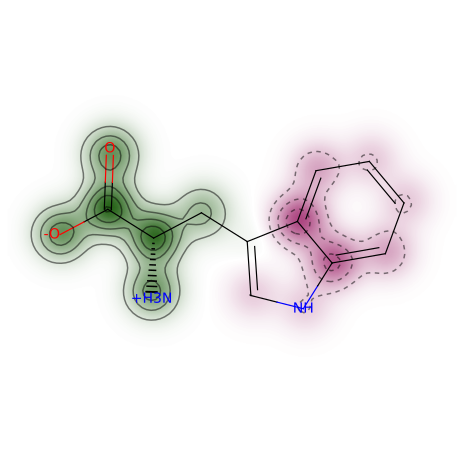

In [48]:
probe_mol = Chem.MolFromSmiles('c1[nH]c2ccccc2c1C[C@H]([NH3+])C(=O)[O-]') # tryptophan
ref_mol = Chem.MolFromSmiles('O=C([C@H](CC1=CNC=N1)[NH3+])[O-]') # histidine

fp_func = SimilarityMaps.GetMorganFingerprint
figure, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(ref_mol, probe_mol, fp_func)

(15.6)=
## 15.6 Atoms and Bonds

RDKit allows access to information on specific atoms and bonds through the `GetAtoms()` and `GetBonds()` methods, respectively. These functions return a sequence type of object that can be iterated through using a `for` loop to access individual atoms or bonds. Using the following methods, the user can access or even modify various pieces of information about the atoms or bonds. Below Table 9 and Table 10 contain some key functions for working with atoms and bonds.

**Table 9** Select Atom Methods
| Function | Description |
|:----------:|---------------|
|`GetDegree()` | Returns number of atoms bonded directly to it, includes hydrogens only if they are explicitly defined |
|`GetAtomicNum()` | Returns atomic number |
|`GetChiralTag()` | Determines if the atom is a chiral center and CW or CCW designation |
|`GetFormalCharge()` | Returns formal charage of atom   |
|`GetHybridization()` | Returns hybridization of atom     |
|`GetIsAromatic()`   | Returns bool as to whether atom is aromatic    |
|`GetIsotope()`   |  Returns isotope number if designated, otherwise returns `0`   |
|`GetNeighbors()` | Returns tuple of directly bonded atoms  |
|`GetSymbol()` |  Returns atomic symbols as a string |
|`GetTotalNumHs()` | Returns number of hydrogens bonded to the atom |
|`InInRing()` |  Returns bool designating if the atom is in a ring  |
|`SetAtomicNum()`| Sets the atomic number to user defined value |
|`SetFormalCharge()` |  Sets formal charge to user defined value |
|`SetIsotope()` |  Sets isotope to user defined integer value  |

As an example, let's look at the atoms in aspirin. 

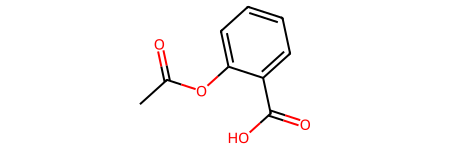

In [49]:
aspirin

If we generate a list populated with the degrees of atoms (i.e., number of other atoms bonded directly to it), you may notice that there are no 4 values even though the methyl (i.e., -CH$_3$) carbon should have four atoms attached to it. This is because the hydrogens are not explicitly designated in the structure (i.e., the are implicit), so they are not counted.

In [50]:
[atom.GetDegree() for atom in aspirin.GetAtoms()]

[1, 3, 1, 2, 3, 2, 2, 2, 2, 3, 3, 1, 1]

We can count the number of implicit hydrogens using the `GetNumImplicitHs()` method, and the third value is a `3` making it the methyl carbon.

In [51]:
[atom.GetNumImplicitHs() for atom in aspirin.GetAtoms()]

[0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]

````{margin}
```{tip}
If you want to make all hydrogens explicitly defined, this is accomplished using the `Chem.AddHs(mol)` function. An example is in [section 16.3.1](16.3.1).
```
````

We can also use these atom methods to change values and attributes of various atoms. For example, we can set the isotopes of the carbonyl carbons (i.e., C=O) to $^{13}$C. This is accomplished with the following code that iterates through all the atoms and finds the carbonyl carbons by testing for atoms that have an atomic number of 6, are not aromatic, and have no hydrogens and then setting the isotope value to 13. The molecular weight is calculated before and after the isotopes are changed for comparison.

In [52]:
Chem.Descriptors.MolWt(aspirin)

180.15899999999996

In [53]:
for atom in aspirin.GetAtoms():
    if atom.GetAtomicNum() == 6 and \
        not atom.GetIsAromatic() and \
        atom.GetTotalNumHs() == 0:
    
        atom.SetIsotope(13)

182.14370968


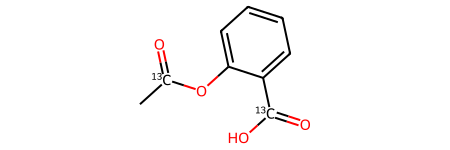

In [54]:
print(Chem.Descriptors.MolWt(aspirin))
aspirin

The molar mass has increased due to two of the carbon atoms being isotopically labeled, and we can see in the image which of the two carbons were isotopically labeled. It is worth nothing that the molecular weight before isotopically labeling assumes a natural distribution of isotopes which for carbon is 98.9% $^{12}$C and 1.1% $^{13}$C. In the isotopically labeled structure, the two carbonyl carbons are 100% $^{13}$C.

Using bond methods, we can perform analogous types of operations except that bonds have different attributes than atoms. A table of selected bond methods is provided below.

**Table 10** Select Bond Methods
| Function | Description |
|:----------:|---------------|
|`GetBeginAtom()` | Returns first atom in bond |
|`GetEndAtom()` | Returns second atom in bond |
|`GetBondType()` | Returns type of bond (e.g., SINGLE, DOUBLE, AROMATIC) |
|`GetIsAromatic()` | Returns bool as to whether bond is aromatic |
|`GetIsConjugated()` | Returns bool as to wether bond is conjugated |
|`IsInRing()` | Returns bool as to wether bond is in ring  |
|`SetBonaType()` | Sets bond type |
|`SetIsAromatic()` | Sets bool designating if a bond is aromatic |

As a demonstration, we will examine the bonds in the structure of acetone and change the carbonyl double bond to a single bond. This is done by searching for a double bond, setting it to a single bond, and then changing the formal charges of the atoms attached to that bond.

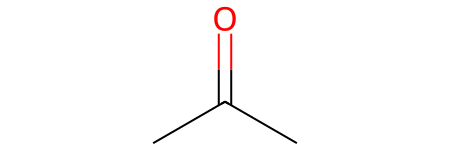

In [55]:
acetone

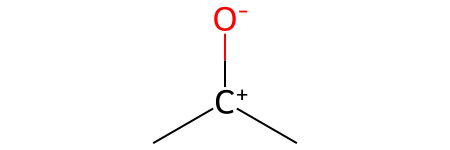

In [56]:
for bond in acetone.GetBonds():
    if bond.GetBondType() == Chem.BondType.DOUBLE:
        bond.SetBondType(Chem.BondType.SINGLE)
        end = bond.GetEndAtom().SetFormalCharge(-1)
        begin = bond.GetBeginAtom().SetFormalCharge(+1)
acetone

(fr15)=
## Further Reading

1. RDKit: Open-Source Cheminformatics Software. [https://www.rdkit.org/](https://www.rdkit.org/) (free resource)
2. The RDKit Book (collection of examples). [https://www.rdkit.org/docs/RDKit_Book.html](https://www.rdkit.org/docs/RDKit_Book.html) (free resource)

## Exercises

Complete the following exercises in a Jupyter notebook using RDKit. You are encouraged to also to use data libraries such as NumPy or pandas to support your solutions. Any data file(s) refered to in the problems can be found in the [data](https://github.com/weisscharlesj/SciCompforChemists/tree/master/notebooks) folder in the same directory as this chapter's Jupyter notebook. Alternatively, you can download a zip file of the data for this chapter from [here](https://github.com/weisscharlesj/data_SciCompforChem) by selecting the appropriate chapter file and then clicking the **Download** button.

1. Load the structure for **morphine** into RDKit using either a SMILES or InChI representation. You will need to either generate one of these representations using chemical drawing software or find one online from a [free resource](15.1).
   
   a) Visualize the structure of morphine and save it as an SVG image file.
   
   b) Use RDKit to determine the number of chiral centers in the structure. Your code should output an integer value, not just a list of chiral centers.
   
   c) Use RDKit to determine the number of hydrogen bond acceptors in the structure.

   d) Use RDKit to determine the number of rings in the structure.
    
2. Load the **amino_acid_SMILES.txt** file and use RDKit for the following.
  
   a) Determine the absolute configureation (i.e., R vs. S) for all the chiral amino acids. Most are the same, but one is an exception. Which is it?

   b) All amino acids, except for histodine which is a little more complex, could be interconverted by simply replacing the side chain with a different side chain. If this this the case, why does one of the amino acids have a different absolute configuration?

6. Use RDKit to generate an image showing all isomers of 1,2-dimethylcyclohexane. You will need to look up the SMILES or other representation first.
